In [24]:
#1
import pandas as pd

df = None

#a)
cities = pd.Series(data = ["Malmö", "Stockholm", "Uppsala", "Göteborg"])
population = pd.Series(data = (347949, 975551, 233839, 583056))

df = pd.DataFrame({"Kommun": cities, "Population": population})

print(df, end = "\n\n")

#b)
gbg = df[df["Kommun"] == "Göteborg"]
print(gbg, end = "\n\n")

#c)
sorted_by_population = df.sort_values(by = "Population", ascending = False)
print(sorted_by_population,  end = "\n\n")



      Kommun  Population
0      Malmö      347949
1  Stockholm      975551
2    Uppsala      233839
3   Göteborg      583056

     Kommun  Population
3  Göteborg      583056

      Kommun  Population
1  Stockholm      975551
3   Göteborg      583056
0      Malmö      347949
2    Uppsala      233839



In [20]:
#d)

df.sort_values(by = "Population", ascending = False).iloc[0:3]

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949


In [26]:
#e)

df["% av Sveriges population"] = df.apply(lambda row: row["Population"] / 10379295 * 100, axis = 1)

df

,Kommun,Population,% av Sveriges population
0,Malmö,347949,3.352338
1,Stockholm,975551,9.399010
2,Uppsala,233839,2.252937
3,Göteborg,583056,5.617491


In [37]:
df = pd.DataFrame({
    "Kommun": ["Malmö", "Stockholm", "Uppsala", "Göteborg"], 
    "Population": [347949, 975551, 233839, 583056]
})

print(df["Kommun"], end = "\n\n")

print(df[df["Kommun"] == "Göteborg"], end = "\n\n")

df = df.sort_values(by = "Population", ascending = False)

print(df, end = "\n\n")

print(df.iloc[0:3])

df["% av befolkningen"] = df.apply(lambda row: row["Population"] / 10379295 * 100, axis = 1)

df

0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
Name: Kommun, dtype: object

     Kommun  Population
3  Göteborg      583056

      Kommun  Population
1  Stockholm      975551
3   Göteborg      583056
0      Malmö      347949
2    Uppsala      233839

      Kommun  Population
1  Stockholm      975551
3   Göteborg      583056
0      Malmö      347949


,Kommun,Population,% av befolkningen
1,Stockholm,975551,9.399010
3,Göteborg,583056,5.617491
0,Malmö,347949,3.352338
2,Uppsala,233839,2.252937


In [89]:
df = pd.read_excel("komtopp50_2020.xlsx", sheet_name = "Totalt")

df = df.iloc[6:]

df = df.rename({
    "Unnamed: 0": "Rang 2020", 
    "Unnamed: 1": "Rang 2019", 
    "Unnamed: 2": "Kommun", 
    "Unnamed: 3": "Folkmängd 2020", 
    "Unnamed: 4": "Folkmängd 2019", 
    "Unnamed: 5": "Förändring"
}, axis = "columns")

df = df.reset_index()

df = df.sort_values(by = "Folkmängd 2020", ascending = False)

df.iloc[-5:]

,index,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
271,277,286,286.0,Åsele,2805,2794.0,0.393701
5,11,287,287.0,Arjeplog,2718,2785.0,-2.405745
29,35,288,288.0,Dorotea,2498,2551.0,-2.077617
194,200,289,289.0,Sorsele,2442,2489.0,-1.888309
12,18,290,290.0,Bjurholm,2387,2408.0,-0.872093


In [90]:
df["Folkmängd 2020"].sum()


10379295

<AxesSubplot:xlabel='Kommun', ylabel='Folkmängd 2020'>

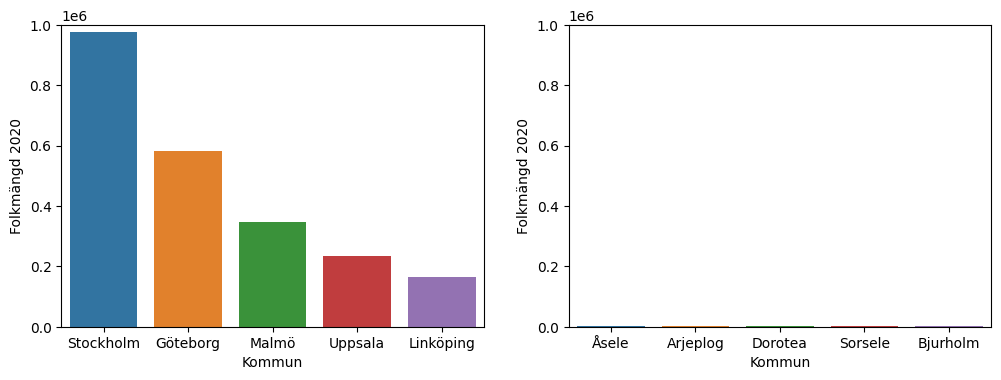

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, dpi = 100, figsize = (12, 4))

ax[0].set_ylim([0, 1000000])
ax[1].set_ylim([0, 1000000])

sns.barplot(data = df.head(), x = "Kommun", y = "Folkmängd 2020", ax = ax[0])
sns.barplot(data = df.tail(), x = "Kommun", y = "Folkmängd 2020", ax = ax[1])

In [88]:
import pandas as pd

df1 = pd.DataFrame({
    "Kolumn1": pd.Series(data = [1, 2, 3, 4, 5]),
    "Kolumn2": pd.Series(data = [9, 8, 7, 6, 5])
})

df2 = pd.DataFrame({
    "Kolumn1": [1, 2, 3, 4, 5],
    "Kolumn2": [9, 8, 7, 6, 5]
})

df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Kolumn1  5 non-null      int64
 1   Kolumn2  5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Kolumn1  5 non-null      int64
 1   Kolumn2  5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


In [126]:
import pandas as pd

df_males = pd.read_excel("komtopp50_2020.xlsx", sheet_name = "Män")
df_females = pd.read_excel("komtopp50_2020.xlsx", sheet_name = "Kvinnor")

def chk_nan(obj):
    return obj == obj

def rename(dataframe):
    for i in range(len(dataframe.columns)):
        
        dataframe.rename(("Unnamed: {i}" = dataframe[f"Unnamed: {i}"][4] if chk_nan(dataframe[f"Unnamed: {i}"][4]) else ""), axis = 1


if 0 == 1:
    df_males = df_males.rename({
        "Unnamed: 0": str(df_males["Unnamed: 0"][4]) + " " + str(df_males["Unnamed: 0"][5]),
        "Unnamed: 1": str(df_males["Unnamed: 1"][4]) + " " + str(df_males["Unnamed: 1"][5]),
        "Unnamed: 2": str(df_males["Unnamed: 2"][4]) + " " + str(df_males["Unnamed: 2"][5]),
        "Unnamed: 3": str(df_males["Unnamed: 3"][4]) + " " + str(df_males["Unnamed: 3"][5]),
        "Unnamed: 4": str(df_males["Unnamed: 4"][4]) + " " + str(df_males["Unnamed: 4"][5]),
        "Unnamed: 5": str(df_males["Unnamed: 5"][4]) + " " + str(df_males["Unnamed: 5"][5]),
    }, axis = 1)

print(chk_nan(df_males["Unnamed: 1"][4]))

True
